# Caida de P$P (Guatemala)

## Conexión con AWS300

In [48]:
import pandas as pd
import pyodbc
import warnings
warnings.filterwarnings('ignore')

conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=AWNTS300;DATABASE=DATALAB;UID=usrdm;PWD=dm$2Admin4')

In [49]:
 #Falta afinar para que sea por país y por campaña
df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)
#df = pd.read_excel('output.xlsx')
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')
#writer.save()

In [50]:
df.head()

,Pkebelista,v201711,v201712,v201713,v201715,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
0,720,6979.771274,4200.445514,6724.908075,8758.605493,0,18,1.0,7152.190837,1,...,8.151404,24,17,25,1,0,0,0,4,1969-02-21
1,89964,2154.041014,2141.305731,2091.087431,2224.961983,0,18,9.0,2047.940153,7,...,12.673257,7,7,5,0,0,0,0,6,1978-12-01
2,90836,1889.314461,3063.642365,2054.850645,4617.455549,0,18,8.0,2190.827464,7,...,8.895457,8,8,7,1,0,0,0,6,1990-11-12
3,263422,2375.302251,2115.988981,2185.302904,5885.626802,0,18,6.0,2650.747593,6,...,16.555325,7,7,4,1,0,0,0,6,1992-05-28
4,267409,1843.579517,1349.515027,1269.000250,2603.406096,0,9,NaN,NaN,10,...,8.751726,5,5,5,1,1,0,0,6,1993-06-01


In [51]:
df[df.Pkebelista == 39]



,Pkebelista,v201711,v201712,v201713,v201715,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
6734,39,28378.70436,28932.354438,35910.672637,24824.20535,1,18,1.0,26915.802299,1,...,11.828285,77,72,92,1,1,0,0,2,1950-07-13


In [52]:
print('La base de datos cuenta con ' + str(df.shape[0]) + ' filas y ' 
      + str(df.shape[1]) +' columnas.')

df.columns

La base de datos cuenta con 15605 filas y 26 columnas.


Index(['Pkebelista', 'v201711', 'v201712', 'v201713', 'v201715', 'Target',
       'Pedidos_ult_18camp', 'DecilAñoAnterior', 'PMNPAñoAnterior',
       'DecilCampAnterior', 'PMNPCampAnterior', 'mct201711', 'mct201712',
       'mct201713', 'ppu201711', 'ppu201712', 'ppu201713', 'Q201711',
       'Q201712', 'Q201713', 'FlagIpUnicoZona', 'pd201711', 'pd201712',
       'pd201713', 'CodComportamientoRolling', 'FechaNacimiento'],
      dtype='object')

In [53]:
#Eliminamos las filas que contengan valores NULL en campos donde no deberían tener.

df = df.dropna(axis=0, how='all', subset=['FechaNacimiento'])

In [54]:
def PromVariacion (num1, num2, num3):
    var1 = ((num2/num1)-1)
    var2 = ((num3/num2)-1)
    PromVar = (var1+var2)/2
    return PromVar*100


In [55]:
df['VarVentas3Camp'] = PromVariacion(df.v201711,df.v201712,df.v201713)
df['VarMCT3Camp'] =PromVariacion(df.mct201711,df.mct201712,df.mct201713)
df['VarPPU3Camp'] =PromVariacion(df.ppu201711,df.ppu201712,df.ppu201713)
df['VarPPU3Camp'] =PromVariacion(df.Q201711,df.Q201712,df.Q201713)
df['PD3Camp'] = df.pd201711 + df.pd201712 +df.pd201713


In [56]:
df1 = df.drop(['v201711', 'v201712','v201713','v201715','mct201711','mct201712','mct201713','ppu201711','ppu201712','ppu201713',
               'Q201711', 'Q201712', 'Q201713', 'pd201711', 'pd201712', 'pd201713'], axis=1)


In [57]:
pd.DataFrame(df1.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Target,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
FechaNacimiento,datetime64[ns]


In [58]:
import numpy as np

#df1['TargetBinary'] = np.where(df1['Target']<-10, 1, 0)

#df1['TargetBinary'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [59]:
import datetime as DT
import io

now = pd.Timestamp(DT.datetime.now())
df1['FechaNacimiento'] = df1['FechaNacimiento'].where(df1['FechaNacimiento'] < now, df1['FechaNacimiento'] -  np.timedelta64(100, 'Y'))   # 2
df1['Edad'] = (now - df1['FechaNacimiento']).astype('<m8[Y]')    # 3

df2 = df1.drop(['FechaNacimiento'], axis=1)

In [60]:
pd.DataFrame(df2.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Target,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
VarVentas3Camp,float64


In [61]:
df2.describe()

,Pkebelista,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,PD3Camp,Edad
count,15605.000000,15605.000000,15605.000000,13389.000000,13389.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,195126.126370,0.410189,15.488561,5.499664,3266.200045,5.499199,3009.730870,0.372445,5.717655,12.554007,11.016673,16.658453,0.322845,39.891894
std,92750.457536,0.491884,3.320055,2.872233,2361.674620,2.872373,2349.897689,0.483471,0.709639,39.349584,39.523005,49.061038,0.724985,12.929166
min,39.000000,0.000000,3.000000,1.000000,545.821340,1.000000,116.138803,0.000000,2.000000,-74.927721,-74.166667,-77.976190,0.000000,10.000000
25%,117739.000000,0.000000,14.000000,3.000000,2263.271511,3.000000,1904.966350,0.000000,5.000000,-7.772329,-12.500000,-10.000000,0.000000,29.000000
50%,216946.000000,0.000000,17.000000,5.000000,2790.398827,5.000000,2404.716542,0.000000,6.000000,6.065071,4.166667,7.777778,0.000000,38.000000
75%,278756.000000,1.000000,18.000000,8.000000,3632.813576,8.000000,3454.091922,1.000000,6.000000,24.934718,25.000000,30.000000,0.000000,49.000000
max,312147.000000,1.000000,18.000000,10.000000,96510.051673,10.000000,76045.373449,1.000000,7.000000,1826.310517,541.666667,988.095238,7.000000,100.000000


# Exploración y visualización

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [29]:
corr_1(df2)

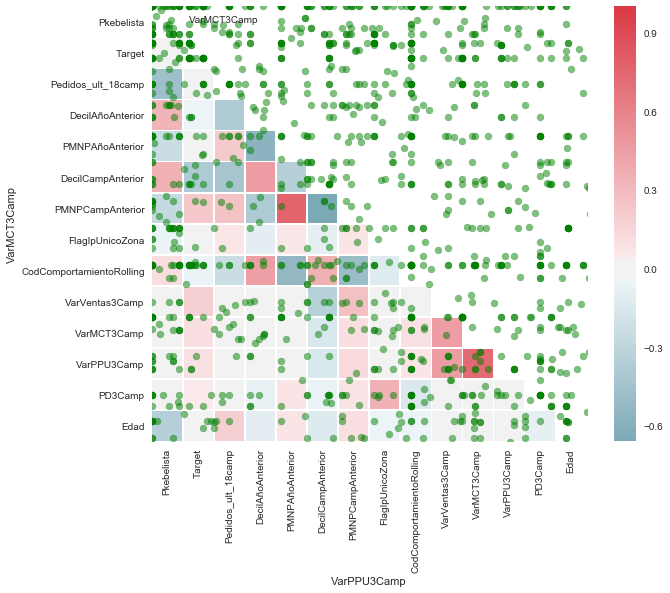

In [30]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.VarPPU3Camp, df2.VarMCT3Camp, c="g", alpha=0.5, marker='o')
plt.xlabel("VarPPU3Camp")
plt.ylabel("VarMCT3Camp")
plt.legend(loc=2)
plt.show()

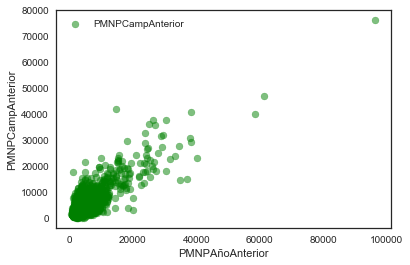

In [31]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.PMNPAñoAnterior, df2.PMNPCampAnterior, c="g", alpha=0.5, marker='o')
plt.xlabel("PMNPAñoAnterior")
plt.ylabel("PMNPCampAnterior")
plt.legend(loc=2)
plt.show()

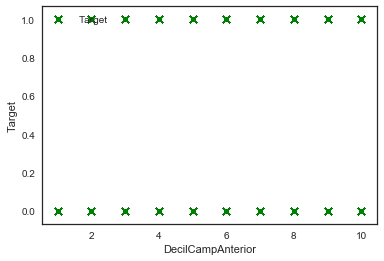

In [32]:
import matplotlib.pyplot as plt
import matplotlib

plt.scatter(df2.DecilCampAnterior, df2.Target, c="g", alpha=0.05, marker='x')
plt.xlabel("DecilCampAnterior")
plt.ylabel("Target")
plt.legend(loc=2)
plt.show()

## Modelo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\cfabbri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
#df2 = df2.drop('Target', axis=1)

df2.head()


,Pkebelista,Target,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,PD3Camp,Edad
0,720,0,18,1.0,7152.190837,1,6724.908075,1,4,10.140075,12.564103,8.946078,0,49.0
1,89964,0,18,9.0,2047.940153,7,2091.087431,0,6,-1.468223,-5.952381,-14.285714,0,39.0
2,90836,0,18,8.0,2190.827464,7,2054.850645,1,6,14.614221,-11.111111,-6.250000,0,27.0
3,263422,0,18,6.0,2650.747593,6,2185.302904,1,6,-3.820671,-23.809524,-21.428571,0,25.0
4,267409,0,9,NaN,NaN,10,1269.000250,1,6,-16.382698,1.666667,0.000000,1,24.0


In [37]:
# 3. Usando IMPUTER de scikit learn: reemplazando los NaN con la media

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2)

prep = imp.transform(df2) 
df23 = pd.DataFrame(prep, columns = df2.columns)

X_train, X_test, y_train, y_test = train_test_split(
df23.loc[:, df23.columns != 'Target'],
 df23[u'Target'].values, 
 test_size=0.15, 
 random_state=42)


q_niveles_arbol = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = q_niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

scores = cross_val_score(clf, df23.loc[:, df23.columns != 'Target'],df23[u'Target'].values,scoring = 'f1',  cv=6)
print('Cross-validated scores: ', scores, 'prom', np.mean(scores))

             precision    recall  f1-score   support

        0.0       0.73      0.76      0.75      1342
        1.0       0.66      0.63      0.64       999

avg / total       0.70      0.70      0.70      2341

Cross-validated scores:  [ 0.61341223  0.66487455  0.65980304  0.62645914  0.62871046  0.66520211] prom 0.643076923309


In [71]:
# 1. Borrando filas con NA en datos del año anterior: trabajamos solo con registros de los cuales se tiene data desde el año pasado.
#df21 = df2.dropna(axis=0, how='all', subset=['DecilAñoAnterior', 'PMNPAñoAnterior'])
# reemplazando NA con un valor para que entren al modelo las filas de las nuevas y no se queden sin estimación.
df21 = df2.fillna('0')
df21 = df21.drop(['Pkebelista'], axis=1)

print(df21.shape)
print(df21.isnull().values.any())


X_train, X_test, y_train, y_test = train_test_split(
df21.loc[:, df21.columns != 'Target'],
 df21[u'Target'].values, 
 test_size=0.15, 
 random_state=42)


niveles_arbol = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))


scores = cross_val_score(clf, df21.loc[:, df21.columns != 'Target'],df21[u'Target'].values,  cv=6)
print('Cross-validated scores: ', scores, 'prom', np.mean(scores))

feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

(15605, 13)
False
             precision    recall  f1-score   support

          0       0.73      0.75      0.74      1342
          1       0.65      0.62      0.63       999

avg / total       0.69      0.69      0.69      2341

Cross-validated scores:  [ 0.69742407  0.71049596  0.69665513  0.70049981  0.70818916  0.7       ] prom 0.702210688197
                          importance
PMNPCampAnterior            0.770621
PMNPAñoAnterior             0.172736
Pedidos_ult_18camp          0.018922
VarVentas3Camp              0.016660
CodComportamientoRolling    0.010809
VarPPU3Camp                 0.006945
Edad                        0.003306
DecilAñoAnterior            0.000000
DecilCampAnterior           0.000000
FlagIpUnicoZona             0.000000
VarMCT3Camp                 0.000000
PD3Camp                     0.000000


In [43]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

In [44]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()


In [45]:
labels = ['Sí Cae', 'Sube o Mantiene']
print_cm(cnf_matrix, labels)

                             Sí Cae Sube o Mantiene 
             Sí Cae           898.0           299.0 
    Sube o Mantiene           275.0           537.0 


In [46]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                          importance
PMNPCampAnterior            0.807123
PMNPAñoAnterior             0.126594
CodComportamientoRolling    0.041241
VarPPU3Camp                 0.008123
VarVentas3Camp              0.007784
Pedidos_ult_18camp          0.006167
VarMCT3Camp                 0.002969
DecilAñoAnterior            0.000000
DecilCampAnterior           0.000000
FlagIpUnicoZona             0.000000
PD3Camp                     0.000000
Edad                        0.000000


In [72]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_jobs=-1, random_state=0)

RFclf.fit(X_train, y_train)

feature_importances = pd.DataFrame(RFclf.feature_importances_, index = X_train.columns, 
columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

scores = cross_val_score(RFclf, df21.loc[:, df21.columns != 'Target'],df21[u'Target'].values,  cv=6)
print(scores)

                          importance
PMNPCampAnterior            0.191585
VarVentas3Camp              0.152500
VarPPU3Camp                 0.110344
PMNPAñoAnterior             0.109217
VarMCT3Camp                 0.108465
Edad                        0.090841
DecilCampAnterior           0.087420
Pedidos_ult_18camp          0.051248
DecilAñoAnterior            0.036227
CodComportamientoRolling    0.025087
PD3Camp                     0.021617
FlagIpUnicoZona             0.015450
[ 0.67243368  0.68935025  0.67358708  0.68089196  0.69434833  0.68384615]


# Next steps

- Hacer que el query de la tabla se actualice automaticamente desde este script

- Traerlo a Dolar

- Probar con otros países y campañas

- Probar otros algoritmos (XGBoost, LightGBM)

- Validar variables con visión de negocio, incorporar nuevas



- BONUS: Integrar con arquitectura AWS